In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
# Generate sample data

In [7]:
from sklearn.datasets import make_blobs
x,_=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=42)

In [8]:
# Fitt AffinityPropagation

In [9]:
from sklearn.cluster import AffinityPropagation
aff_propagation=AffinityPropagation(damping=0.5,random_state=42)
aff_propagation.fit(x)

AffinityPropagation(random_state=42)

In [10]:
# Get cluster centers and labels

In [11]:
cluster_centers=aff_propagation.cluster_centers_
labels=aff_propagation.labels_
labels

array([  0,   1,   2, 184,   3, 184,   4, 184,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18, 184,  19,  20,  21,
        22, 184, 184,  23,  24,  25,  26,  27,  28,  29,  30, 184,  31,
       184,  32,  33,  34, 184,  35,  36,  37,  38,  39,  40, 184,  41,
       184,  42, 184,  43,  44,  45,  46,  47,  48,  49,  50,  51, 184,
       184, 184, 184, 184,  52, 184, 184,  53,  54,  55,  56, 184, 184,
        57, 184,  58,  59,  60,  61, 184,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72, 184,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83, 184,  84,  85,  86,  87,  88,  89,  90,  91,
       184,  92, 184, 184, 184,  93,  94, 184,  95,  96,  97,  98, 184,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 184, 108, 109, 184,
       110, 111, 112, 113, 114, 184, 115, 116, 117, 118, 184, 119, 120,
       184, 121, 122, 123, 124, 125, 184, 126, 127, 128, 184, 129, 130,
       131, 132, 133, 184, 134, 135, 184, 184, 136, 137, 184, 13

In [12]:
# Plot the clusters

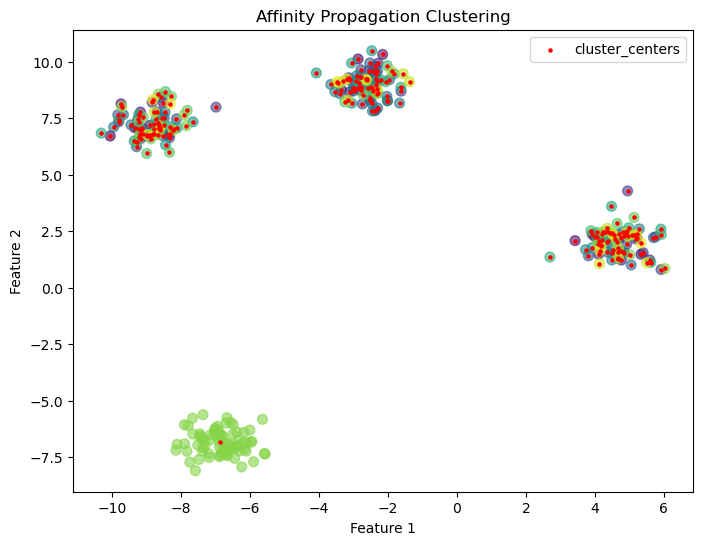

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis',
            s=50,alpha=0.6)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='red',
            marker='.',s=20,label="cluster_centers")
plt.title("Affinity Propagation Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [14]:
supervised=pd.DataFrame(dataset)

In [15]:
supervised['cluster_group'] = labels[:len(supervised)]

In [16]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,184
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,184
196,197,Female,45,126,28,184
197,198,Male,32,126,74,149
198,199,Male,32,137,18,150


In [17]:
print(len(labels), len(supervised))

300 200


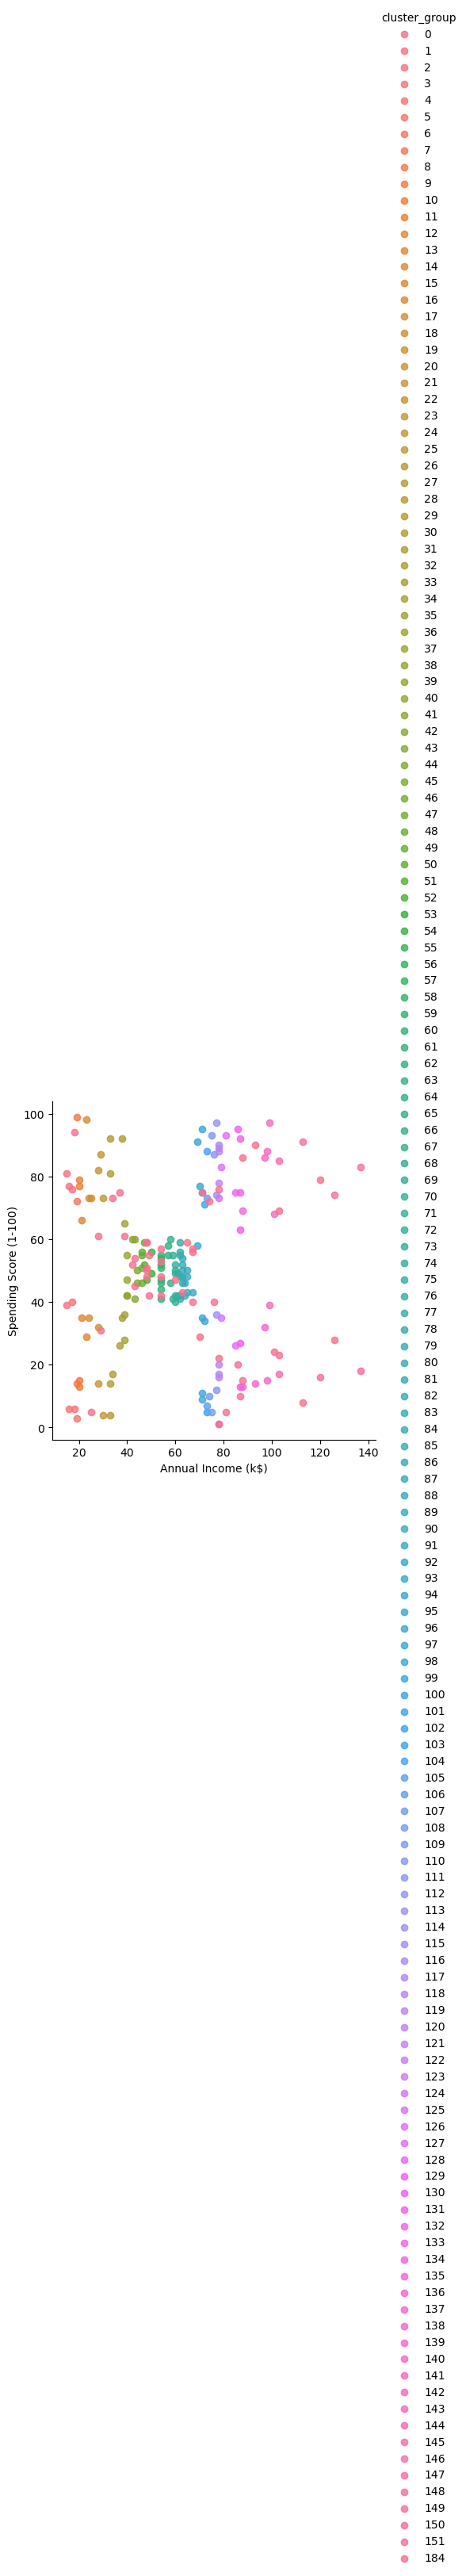

In [44]:

import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)